<a href="https://colab.research.google.com/github/0712Rit/ML_Analysis/blob/main/Retail_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA Project: Retail Sales Analysis

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Setting visualization style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,5)


In [6]:
#Loading Dataset
df = pd.read_csv("retail sales data.csv")
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,24-11-2023,CUST001,Male,34,Beauty,3,50,150
1,2,27-02-2023,CUST002,Female,26,Clothing,2,500,1000
2,3,13-01-2023,CUST003,Male,50,Electronics,1,30,30
3,4,21-05-2023,CUST004,Male,37,Clothing,1,500,500
4,5,06-05-2023,CUST005,Male,30,Beauty,2,50,100


In [10]:
#Data Cleaning
df.info()
print("\nMissing Values:\n", df.isnull().sum())  #Chexking null values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB

Missing Values:
 Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [11]:
df.drop_duplicates(inplace=True) #Dropping Missing Values

In [12]:
df.dropna(inplace=True) #Drop rows with NULL values

In [17]:
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True ) #Converting date column to datetime format

Basic EDA

In [22]:
# Total Sales
total_sales = df['Total Amount'].sum()
print("Total Sales:", total_sales)


Total Sales: 456000


In [21]:
# Unique Customers
unique_customers = df['Customer ID'].nunique()
print("Unique Customers:", unique_customers)

Unique Customers: 1000


In [23]:
# Top 10 Spenders
top_spenders = df.groupby('Customer ID')['Total Amount'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Spenders:\n", top_spenders)


Top 10 Spenders:
 Customer ID
CUST015    2000
CUST412    2000
CUST970    2000
CUST547    2000
CUST281    2000
CUST416    2000
CUST420    2000
CUST927    2000
CUST447    2000
CUST342    2000
Name: Total Amount, dtype: int64


In [24]:
# Revenue by Category
revenue_by_category = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)
print("\nRevenue by Category:\n", revenue_by_category)


Revenue by Category:
 Product Category
Electronics    156905
Clothing       155580
Beauty         143515
Name: Total Amount, dtype: int64


TREND ANALYSIS

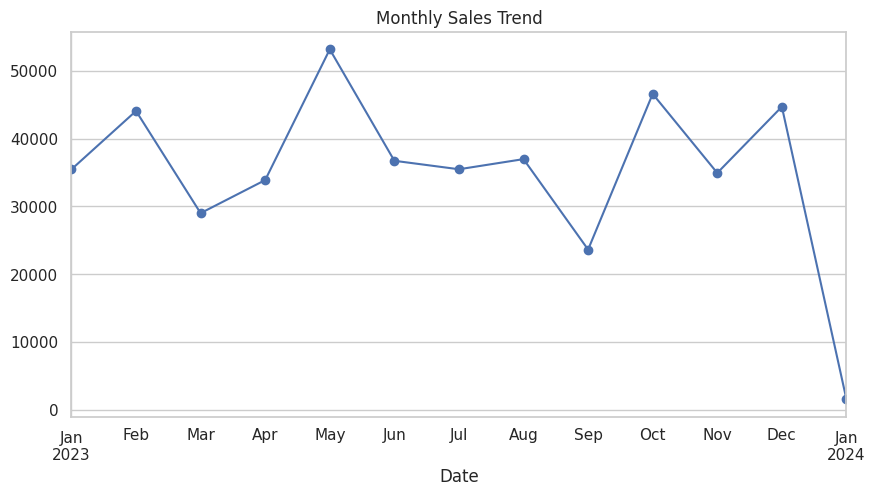

In [25]:
# Monthly Sales Trend
monthly_sales = df.groupby(df['Date'].dt.to_period("M"))['Total Amount'].sum()
monthly_sales.plot(kind='line', marker='o', title="Monthly Sales Trend")
plt.show()

In [ ]:
# City-wise Sales
city_sales = df.groupby('City')['Total_Sales'].sum().sort_values(ascending=False)
city_sales.plot(kind='bar', title="City-wise Sales")
plt.show()

CUSTOMER INSIGHTS


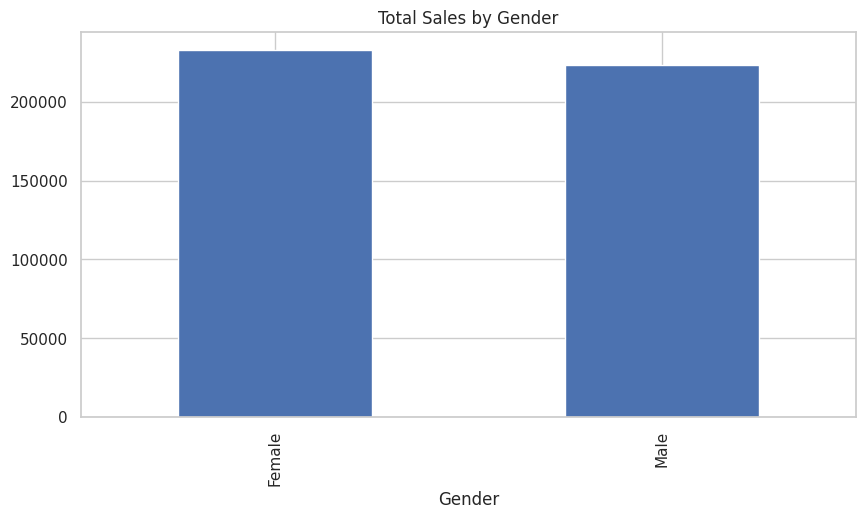

In [27]:
# Gender-based spending
gender_sales = df.groupby('Gender')['Total Amount'].sum()
gender_sales.plot(kind='bar', title="Total Sales by Gender")
plt.show()

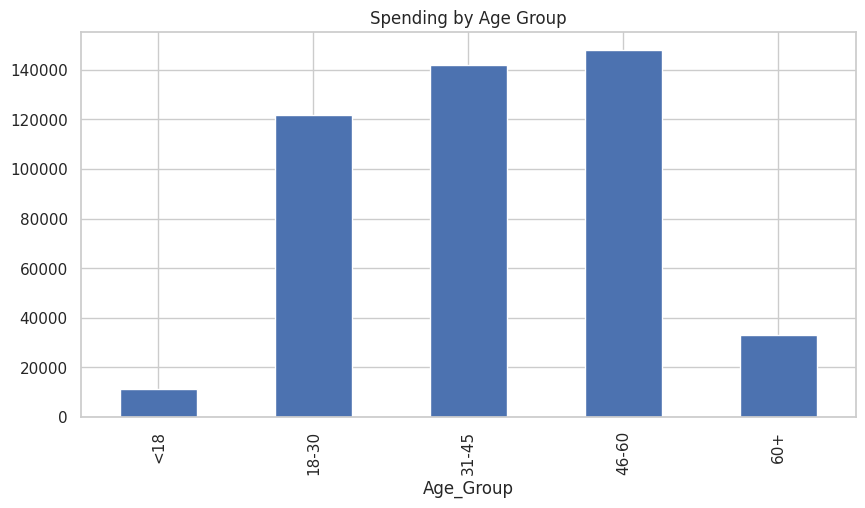

In [33]:
# Spending by Age Group
df['Age_Group'] = pd.cut(df['Age'], bins=[0,18,30,45,60,100],
                         labels=["<18","18-30","31-45","46-60","60+"])
age_group_sales = df.groupby('Age_Group', observed=False)['Total Amount'].sum()
age_group_sales.plot(kind='bar', title="Spending by Age Group")
plt.show()

PRODUCT ANALYSIS


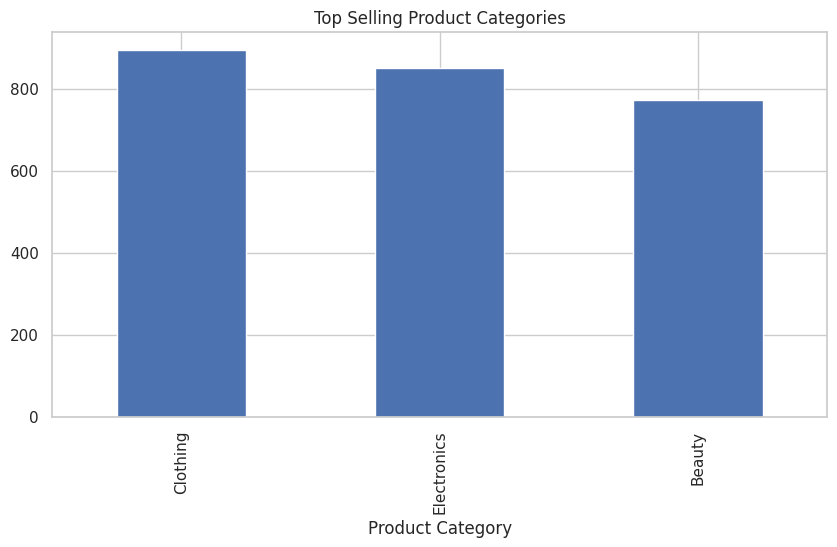

In [34]:
# Top-selling Products by Quantity
top_products = df.groupby('Product Category')['Quantity'].sum().sort_values(ascending=False)
top_products.plot(kind='bar', title="Top Selling Product Categories")
plt.show()


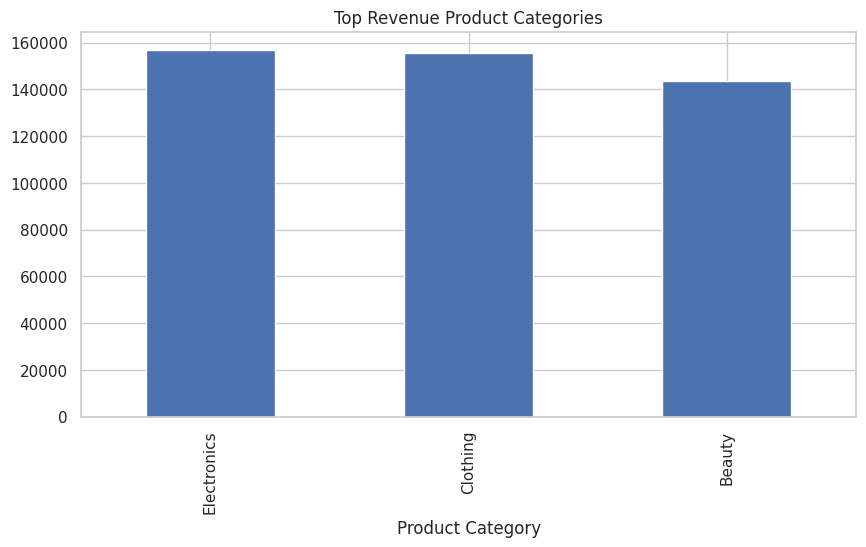

In [35]:
# Top Categories by Revenue
top_revenue_products = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)
top_revenue_products.plot(kind='bar', title="Top Revenue Product Categories")
plt.show()

STANDARD VISUALIZATIONS

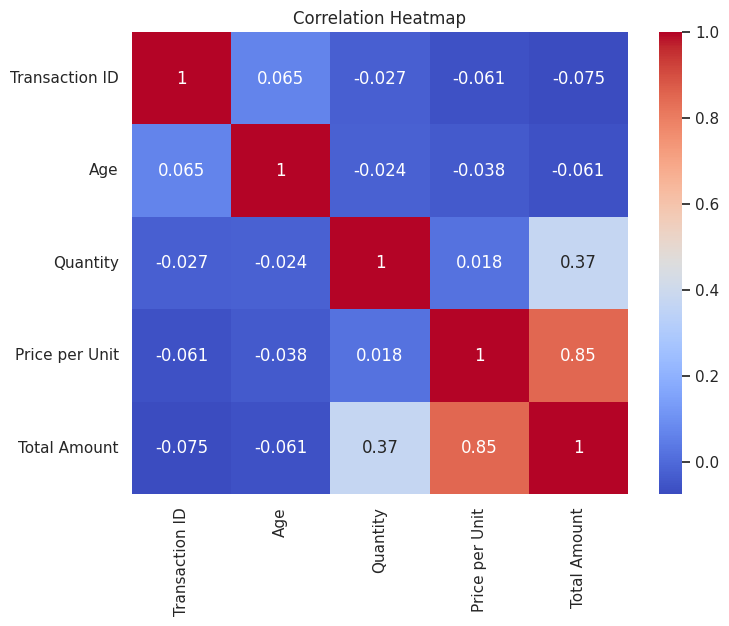

In [37]:
# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

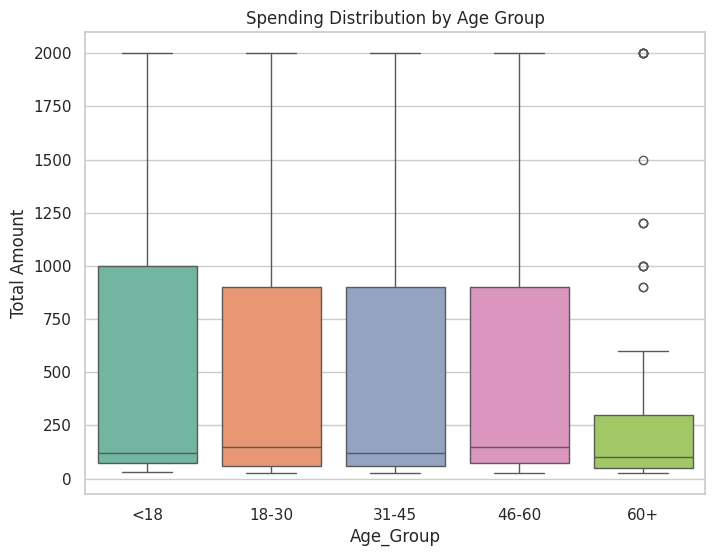

In [40]:
# Boxplot: Age Group vs Spending
plt.figure(figsize=(8,6))
sns.boxplot(x="Age_Group", y="Total Amount", data=df, palette="Set2", hue="Age_Group", legend=False)
plt.title("Spending Distribution by Age Group")
plt.show()

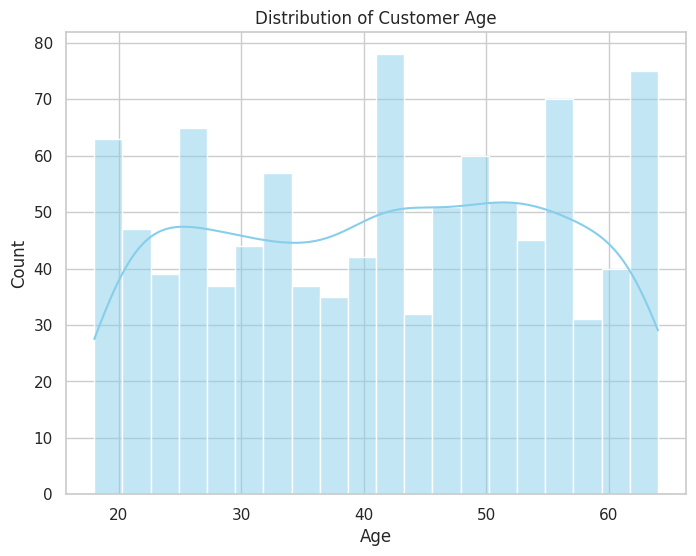

In [41]:
# Distribution of Customer Age
plt.figure(figsize=(8,6))
sns.histplot(df['Age'], bins=20, kde=True, color="skyblue")
plt.title("Distribution of Customer Age")
plt.show()

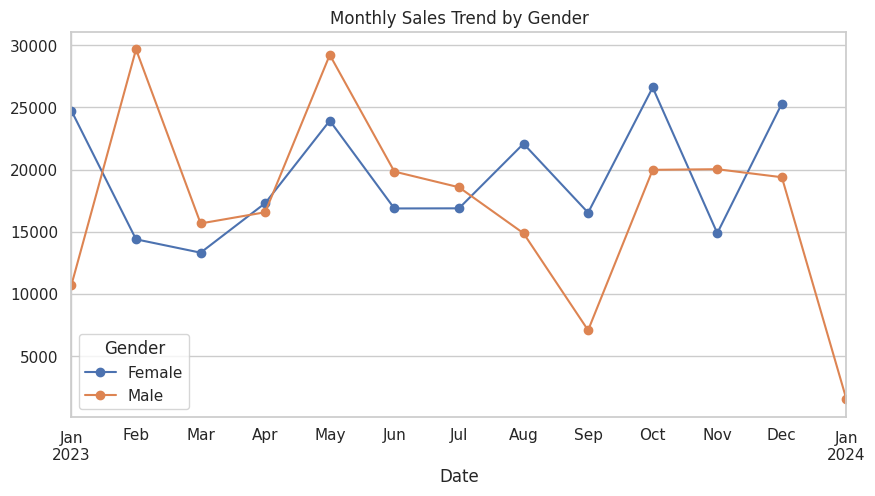

In [42]:
# 4. Sales Trend by Gender
monthly_gender_sales = df.groupby([df['Date'].dt.to_period("M"), 'Gender'])['Total Amount'].sum().unstack()
monthly_gender_sales.plot(kind="line", marker='o')
plt.title("Monthly Sales Trend by Gender")
plt.show()